<a href="https://colab.research.google.com/github/destrex271/edgeai-course/blob/main/jit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Fast
import numpy
from time import time

def filter2d(image, filt):
    M, N = image.shape
    Mf, Nf = filt.shape
    Mf2 = Mf//2   # Mf // 2 to -(Mf // 2 + 1)
    Nf2 = Nf // 2
    result  = numpy.zeros_like(image)
    # Mf2 -> M - Mf2 to avoid crossing over boundaries
    for i in range(Mf2, M-Mf2):
        for j in range(Nf2, N-Nf2):
            result[i,j] = numpy.sum(image[i-Mf2:i+Mf2+1, j-Nf2:j+Nf2+1] * filt)

    return result

tic = time()
image = numpy.random.random((100, 100))
filt = numpy.random.random((9, 9))
res = filter2d(image, filt)
toc = time()
print('Time taken: ', toc-tic)


Time taken:  0.08751702308654785


In [ ]:
# Above is better
import numpy
from time import time

# Correlation and Convolution

# Slower approach -> no numpy -> no acceleration

def filter2d(image, filt):
    M, N = image.shape
    Mf, Nf = filt.shape
    Mf2 = Mf//2   # Mf // 2 to -(Mf // 2 + 1)
    Nf2 = Nf // 2
    result  = numpy.zeros_like(image)
    # Mf2 -> M - Mf2 to avoid crossing over boundaries
    for i in range(Mf2, M-Mf2):
        for j in range(Nf2, N-Nf2):
          num = 0.0
          for ii in range(Mf):
            for jj in range(Nf):
              num += (image[i-Mf2+ii, j-Nf2+jj] * filt[Mf - 1 - ii, Nf - 1 - jj]) # Transposed for correlation
              # print(num)

          result[i, j] = num

    return result

tic = time()
image = numpy.random.random((100, 100))
filt = numpy.random.random((3, 3))
res = filter2d(image, filt)
toc = time()
print('Time taken: ', toc-tic)

Time taken:  0.14585089683532715


In [ ]:
%%timeit
tic = time()
image = numpy.random.random((100, 100))
filt = numpy.random.random((3, 3))
res = filter2d(image, filt)
toc = time()
# print('Time taken: ', toc-tic)

78.9 ms ± 26.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
import numpy
from time import time

def filter2d(image, filt):
    M, N = image.shape
    Mf, Nf = filt.shape
    Mf2 = Mf//2   # Mf // 2 to -(Mf // 2 + 1)
    Nf2 = Nf // 2
    result  = numpy.zeros_like(image)
    # Mf2 -> M - Mf2 to avoid crossing over boundaries
    for i in range(Mf2, M-Mf2):
        for j in range(Nf2, N-Nf2):
            result[i,j] = numpy.sum(image[i-Mf2:i+Mf2+1, j-Nf2:j+Nf2+1] * filt)

    return result

from numba import double, jit
# Return type(Argtype1[dimensions], Argtype1[dimensions])
fast_filter2d = jit(double[:,:](double[:,:], double[:,:]))(filter2d)

tic = time()
img= numpy.random.random((100, 100))
print(type(img))
filt = numpy.random.random((3,3))
res = fast_filter2d(img, filt)
toc = time()
print("Time taken: ", toc - tic)

<class 'numpy.ndarray'>
Time taken:  0.004532337188720703


In [ ]:
import numpy
from time import time

def filter2d(image, filt):
    M, N = image.shape
    Mf, Nf = filt.shape
    Mf2 = Mf//2   # Mf // 2 to -(Mf // 2 + 1)
    Nf2 = Nf // 2
    result  = numpy.zeros_like(image)
    # Mf2 -> M - Mf2 to avoid crossing over boundaries
    for i in range(Mf2, M-Mf2):
        for j in range(Nf2, N-Nf2):
            result[i,j] = numpy.uint8(numpy.sum(image[i-Mf2:i+Mf2+1, j-Nf2:j+Nf2+1] * filt))

    return result

from numba import double, jit
from numba import int8 as it
# Return type(Argtype1[dimensions], Argtype1[dimensions])
fast_filter2d = jit(double[:,:](it[:,:], it[:,:]))(filter2d)

tic = time()
img= numpy.random.random((100, 100))
filt = numpy.random.random((3,3))
res = fast_filter2d(img, filt)
toc = time()
print("Time taken: ", toc - tic)

<ipython-input-17-61825bf4a8eb>:4: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "filter2d" failed type inference due to: No conversion from array(int8, 2d, C) to array(float64, 2d, A) for '$152return_value.1', defined at None

File "<ipython-input-17-61825bf4a8eb>", line 15:
def filter2d(image, filt):
    <source elided>

    return result
    ^

During: typing of assignment at <ipython-input-17-61825bf4a8eb> (15)

File "<ipython-input-17-61825bf4a8eb>", line 15:
def filter2d(image, filt):
    <source elided>

    return result
    ^

  def filter2d(image, filt):
<ipython-input-17-61825bf4a8eb>:4: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "filter2d" failed type inference due to: Cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "<ipython-input-17-61825bf4a8eb>", line 11:
def filter2d(image, filt):
    <source elided>
    # Mf2 -> M - Mf2 to a

Time taken:  0.8513393402099609


In [ ]:
!ls

fl.jpg	sample_data


918 ms ± 130 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


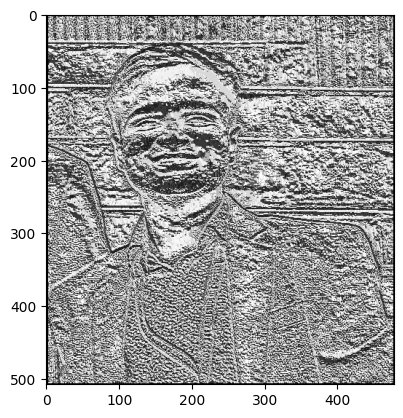

In [4]:
%%timeit

import numpy as np
import cv2
import matplotlib.pyplot as plt
from numba import jit, double, uint8, njit, prange

@njit(parallel=True)
def filter(img, filt):
  M, N = img.shape
  Mf, Nf = filt.shape
  Mf2 = Mf//2
  Nf2 = Nf//2
  result = np.zeros_like(img)

  for i in prange(Mf, M-Mf2):
    for j in prange(Nf, N-Nf2):
      window = img[i - Mf2: i + Mf2 + 1, j - Nf2: j + Nf2 + 1]
      center = window[Mf2, Nf2]
      bin_vals = np.zeros((Mf, Nf), dtype=np.uint8)

      # LBP filter for 3x3 window
      for ii in prange(Mf):
        for jj in prange(Nf):
          if window[ii, jj] >= center:
            bin_vals[ii, jj] = 1

      bin_vals = bin_vals.flatten()
      # print(bin_vals)
      lbp_coeff = 0
      for k in range(len(bin_vals)):
        lbp_coeff += bin_vals[k] * (2**k)
        # print(2**k, bin_vals[k])
      result[i, j] = np.uint8(lbp_coeff)
      # print(result[i, j])
  return result



# fast_filter = jit(double[:,:](uint8[:,:], uint8[:,:]))(filter)

img = cv2.imread('fl.jpg', 0)
# img = cv2.cvtColor(img, 0)
filt = np.random.random((3,3))
imgf = filter(img, filt)
pl = imgf.flatten()
# print()
plt.imshow(imgf, cmap="gray")
# plt.hist(pl)
img.shape